In [1]:
from pathlib import Path
import joblib
import numpy as np
import shap
from scipy import sparse

# Definitions

In [2]:
ROOT = Path('..')
MODELS_DIR = ROOT / 'models'
DATA_DIR = ROOT / 'data'
RAW_DATA_DIR = DATA_DIR / 'raw'

## Load data used in training

In [3]:
# from spase, compressed matrices
features_csr = sparse.load_npz(RAW_DATA_DIR / 'train' / 'sparse_train_X.npz')
targets_csr = sparse.load_npz(RAW_DATA_DIR / 'train' / 'sparse_train_y.npz')

# as numpy arrays
features = features_csr.toarray()
targets = targets_csr.toarray().squeeze()

# Load best model

In [5]:
best_model_path = MODELS_DIR / 'sample_rf.joblib'
model = joblib.load(best_model_path)
model

RandomForestClassifier(max_depth=18, max_samples=0.6879025773510774,
                       min_samples_leaf=8, n_estimators=189, random_state=123)

In [6]:
from sklearn.utils.validation import check_is_fitted

check_is_fitted(model)

# Instantiate SHAP Explainer

In [7]:
explainer = shap.Explainer(model)
shap_values = explainer(features)
# shap_values = explainer.shap_values(features)
# shap_explanation = explainer(features)

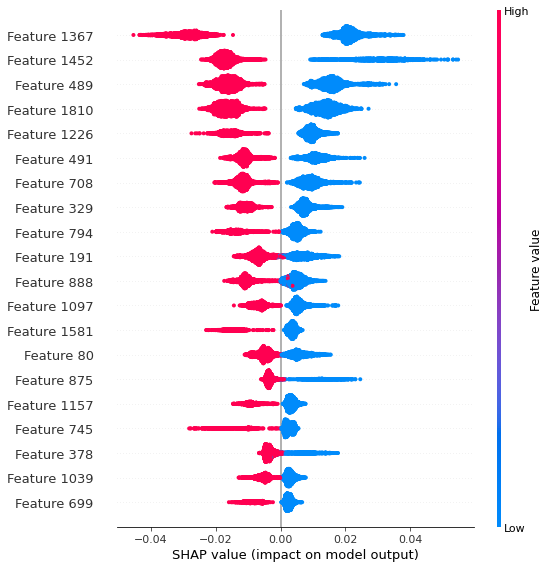

In [9]:
# nummary_plot explaining target class at index 0
shap.summary_plot(shap_values[:,:,0], features)

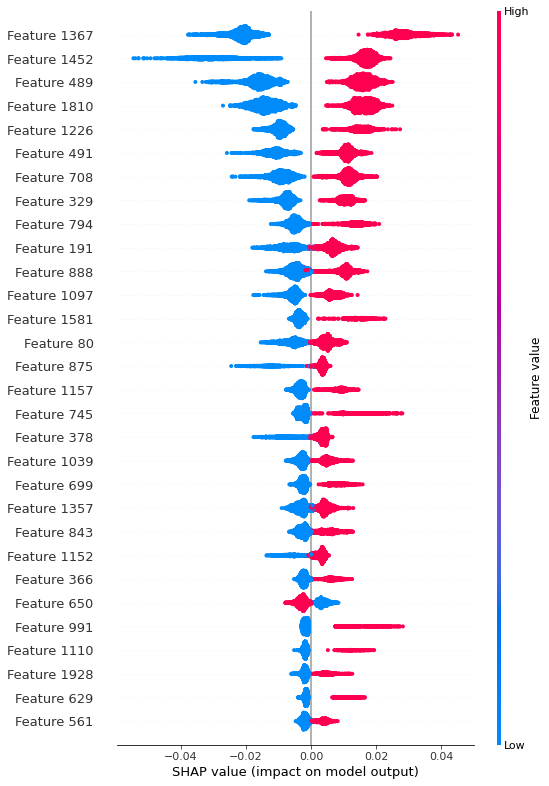

In [19]:
# nummary_plot explaining target class at index 1
shap.summary_plot(shap_values[:,:,1], features, max_display=30)

### Bar plot

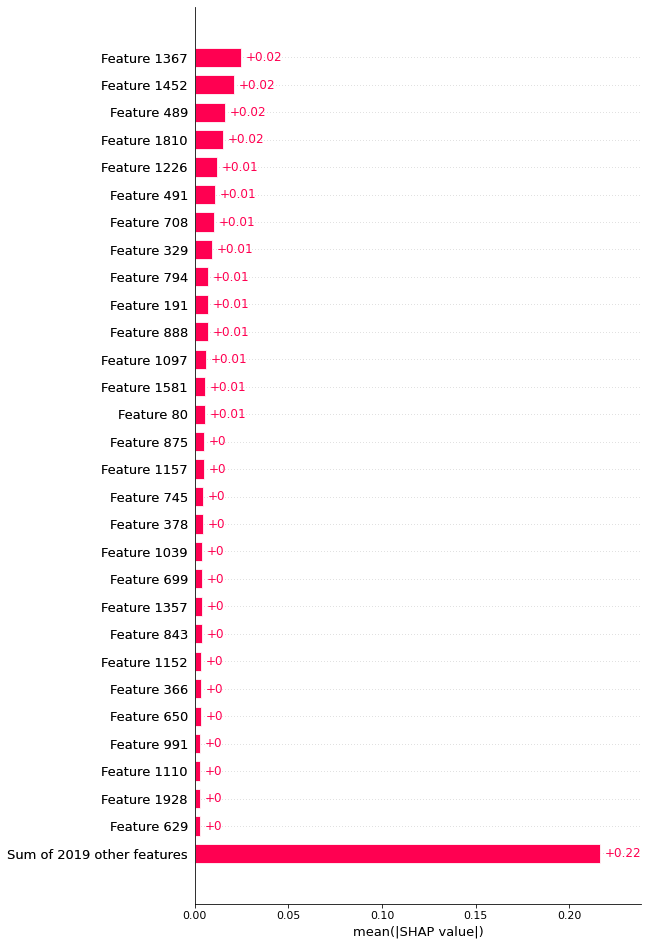

In [18]:
# summarize the effects of all the features
shap.plots.bar(shap_values[:,:,0], max_display=30)

In [ ]:
# summarize the effects of all the features
shap.plots.bar(shap_explanation)